### The Effects of Truncation Selection on the Variance of Polygenic Metric Traits

#### Brett Olsen
#### Washington University in St. Louis

Classical quantitative genetics deals largely with traits which vary continuously rather than discretely, such as milk production in cows, birth-weight in mice, or height in humans.
For discrete traits, we can often identify the gene or genes which contribute to the observed phenotypes, characterize the properties of different genotypes, and rigorously examine the effects of selection, drift, etc. on the population.
For continuous traits we often cannot make a rigorous identification of all contributors to the trait, whether they be environmental variance (such as the effect of soil fertility on plant height), stochastic, or multiple genes contributing in additive or non-additive ways.
Instead, we can isolate the fraction of the variance of a population that results from additive genetic effects, the narrow-sense heritability $h^2$, by measuring the response of the trait to selection.
We take the parent population, restrict it to some number of individuals of high or low values of the trait, and use those parents to sire the next generation.
The response to selection - the average trait value of the second generation - is governed by the breeder's equation:

\begin{equation}
    R = h^2 S
\end{equation}

where $S$ is the selection differential, the difference between the average trait value of the whole parental population and the average trait value of the individuals chosen to produce the child generation, $h^2$ is the narrow-sense heritability, and $R$ is the response to selection - the difference between the mean value of the parental and child generations.
This equation can be used retrospectively to estimate the heritability of a trait, or prospectively, to predict the response to given selective pressures where $h^2$ is known from other experiments.
For example, suppose we have a normally distributed trait where $h^2$ is known to be 0.8 from analysis of relatives (*e.g.* trait correlations between twins, parent/child, half-sibs, or full-sibs).
If we take a parental population with mean 0.0 and standard deviation 1.0 and choose only the 10% of individuals with the highest trait value to produce the child generation, we expect the child population to be shifted to a higher mean:

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy
from __future__ import division

1.28155156554


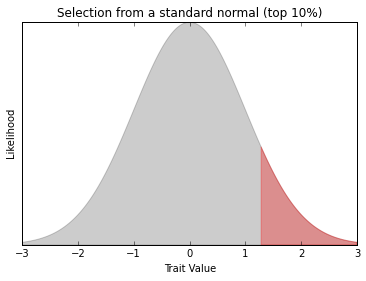

In [4]:
plt.figure(figsize=(6, 4))
xvals = np.arange(-3, 3, 0.001)
cutoff = stats.norm.ppf(0.90)
plt.fill_between(xvals, 0, stats.norm.pdf(xvals), color='k', alpha=0.2)
plt.fill_between(xvals[xvals > cutoff], 0, 
                 stats.norm.pdf(xvals[xvals > cutoff]), color='r', alpha=0.3)
plt.xlabel('Trait Value')
plt.ylabel('Likelihood')
plt.yticks([])
plt.title('Selection from a standard normal (top 10%)')
print cutoff

In [5]:
h2 = 0.8
parent_mean, parent_var = stats.truncnorm.stats(cutoff, 20, loc=0, scale=1)
print parent_mean, parent_var, 1.0 - parent_var
newmean = h2 * parent_mean
print newmean

1.75498331932 0.169135169277 0.830864830723
1.40398665546


Selection of the top 10% of a normally distributed population corresponds to selecting those parents 1.28 standard deviations or more above the initial population mean.
These selected parents are distributed non-normally, instead as a truncated normal distribution with a long positive tail, and with a population mean of 1.75 and population standard deviation of 0.41, as measured in standard deviations of the initial population.
The difference between the selected parents and the initial population (1.75 - 0) gives us $S=1.75$, and with $h^2$ known *a priori* to be 0.8, we calculate response to selection to be $R = S h^2 = 1.40$, or in other words, that the child generation will have a mean trait value 1.4 standard deviations larger than that of the initial population.

This response of the mean trait value to selection has been well understood for many years and used widely.
However, the mean value of the new child population underdescribes the population distribution.
We might assume, given random mating between the selected parents, that the new child population will have the trait of interest distributed approximately normally.
Even with this assumption, we still do not know the variance of the new population.
There have been several approaches on how to estimate the variance of a population under selection.

One approach, used implicitly by Harpending & Cochran (2013) in their work on assortative mating, relates the change in variance of the selected parental population and the child population using the narrow sense heritability, similarly to use of the breeder's equation on population means:

\begin{equation}
\sigma_1^2 = \sigma_0^2 + \Delta_{\sigma^2} h^2
\end{equation}

That is, the variance of the child population is equal to the variance of the (unselected) parent population plus the change in the variance of the caused by selection, scaled by the narrow-sense heritability.
Using this model, the selected group of parents have a (much reduced) variance of 0.169, giving a $\Delta_{\sigma^2} = -0.83$.
Therefore, the variance of the child population can be estimated as $1.0 - 0.83 * 0.8 = 0.335$, or a standard deviation of 0.579.
Unfortunately, this approach does not provide the correct answer - these large reductions in variance are not observed, and are implicitly dependent on a (wrong) blending model of inheritance, under which additive genetic variance in breeding populations would quickly be reduced to zero.

We will consider two effects that can change the population variance under truncation selection:  changes in gene frequency, and changes in disequilibrium.

### Gene Frequency Effects on Variance

Suppose for the sake of simplicity we have a population of haploid organisms with a particular metric trait of interest, with mean value $\mu$ and variance $V$.
The total phenotypic variance of this trait $V$ can be split into genetic and environmental components $V_G$ and $V_E$, so that

$V = V_G + V_E.$

We will assume that there are no epistatic contributions to the genetic variance, that is, that there are no gene-gene interactions.
Because the organisms are haploid rather than diploid, we can also ignore dominance contributions to the genetic variance.
In this case, the genetic variance will be controlled by the additive genetic variance $V_A$,

$V = V_A + V_E.$

The narrow-sense heritability of the trait $h^2$ is then simply the ratio of the additive genetic to total variance:

$h^2 = \frac{V_A}{V}.$

Suppose that this trait is controlled by $N$ genes, with each gene having either a negative or a positive allele, with the initial prevalence of the positive allele for each trait being $p_i$.
The variance in each gene then contributes some fraction $f_i$ of the phenotypic variance of the trait, where

$\sum_{i=1}^N f_i = h^2.$

If we then perform a threshold selection, restricting the parents of the next generation to those above some threshold $t$, what will be the new prevalence $p_i^{'}$ of this gene in the next generation?

Let us examine the distribution of trait values ignoring the effect of gene $i$. 
This distribution would still be approximately normally distributed, but with a slightly smaller variance, equal to

$V_{not \; i} = V(1 - f_i).$

Gene $i$ itself has a variance of $V f_i$, but it is *not* normally distributed, but is instead bimodal, with one positive and one negative allele.
We'll call the additive effect of the positive versus negative allele $D$; that is, the positive allele contributes a value of $D$ to the value of the trait.
We can then calculate $D$ in terms of $V$, $f_i$ and $p_i$:

$D = \sqrt{\frac{V f_i}{p_i(1-p_i)}}.$

Let us plot the distribution of trait values in the absence of gene $i$.  


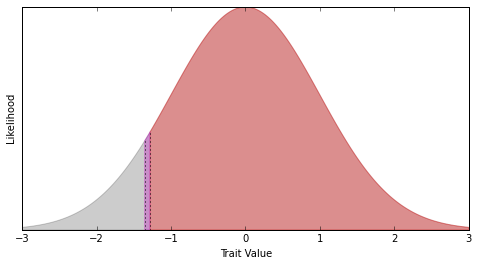

In [6]:
#Use a standard normal distribution
V = 1.0
mu = 0.0

f = 1 / 1000
p = 0.25

rv = stats.norm(loc=mu, scale=(1-f)*V)

D = np.sqrt((V * f)/(p * (1 - p)))

plt.figure(figsize=(8, 4))
xvals = np.arange(-3, 3, 0.001)

#Threshold value for removal of bottom 10% of the population
frac_removed = 0.10
t = stats.norm.ppf(0.10) #Not quite exact - this is based on the normal distribution


plt.fill_between(xvals, 0, rv.pdf(xvals), color='k', alpha=0.2)
plt.fill_between(xvals[xvals > t], 0, 
                 rv.pdf(xvals[xvals > t]), color='r', alpha=0.3)
plt.fill_between(xvals[(t-D < xvals) & (xvals < t)], 0,
                 rv.pdf(xvals[(t-D < xvals) & (xvals < t)]), color='m', alpha=0.3)

plt.plot([t, t], [0, rv.pdf(t)], ':k')
plt.plot([t-D, t-D], [0, rv.pdf(t-D)], ':k')

plt.xlabel('Trait Value')
plt.ylabel('Likelihood')
plt.yticks([])
plt.title('')

Individuals with trait values $x > t$ (in red) will always fall above the threshold regardless of the effect of gene $i$, while those with trait values $x < t-D$ (in grey) will always fall below the threshold regardless of gene $i$.
For those with intermediate values (in magenta), their inclusion in the reproducing population above the threshold $t$ depends on the their allele at gene $i$ - they will be included if and only if they have the positive allele.
This means that the reproducing population will include the red region (where $p_i$ fraction of individuals have the positive allele at gene $i$) and part of the magenta region (where only $p_i$ fraction of individuals will be included, but all those included will have the positive allele).
Thus, $p_i'$, the prevalence of the positive allele after selection, will go up slightly.
Assuming that the distribution of trait values in the absence of gene $i$ is approximately normal, then we can calculate the new prevalence $p_i'$ of the positive allele above the threshold $t$ as:

\begin{equation}
p_i' = \frac{p_i \int_{t-D}^{\infty}e^{\frac{-(x-\mu)^2}{2V(1-f)}}dx}
            {\int_{t}^{\infty}e^{\frac{-(x-\mu)^2}{2V(1-f)}}dx + p_i \int_{t-D}^{t}e^{\frac{-(x-\mu)^2}{2V(1-f)}}dx}
\end{equation}

or

\begin{equation}
p_i' = \frac{p_i \int_{t-D}^{\infty}e^{\frac{-(x-\mu)^2}{2V(1-f)}}dx}
            {(1-p_i)\int_{t}^{\infty}e^{\frac{-(x-\mu)^2}{2V(1-f)}}dx + p_i \int_{t-D}^{\infty}e^{\frac{-(x-\mu)^2}{2V(1-f)}}dx}
\end{equation}

In [7]:
def refine_threshold(p, f, frac_lost, V=1, mu=0, epsilon=1e-15):
    rv = stats.norm(loc=mu, scale=V * (1 - f))
    t = rv.ppf(frac_lost)
    D = np.sqrt((V * f) / (p * (1 - p)))
    #Note that t isn't exact yet, because we've removed this gene from the distribution and it's not normal.
    #We'll use this as a starting point and binary search to identify it such that
    #p * low + (1 - p) * hi = 1 - frac_lost
    def calc_kept(t):
        return p * rv.sf(t-D) + (1 - p) * rv.sf(t)
    
    if t < 0:
        upper, lower = 0.0, 2 * t
    elif t > 0:
        upper, lower = 2 * t, 0.0
    else:
        upper, lower = 0.1, -0.1
    
    while calc_kept(lower) - calc_kept(upper) > epsilon:
        mid = (upper + lower) / 2
        if calc_kept(mid) <= 1 - frac_lost:
            upper = mid
        else:
            lower = mid
    return mid   

def update_prevalence(p, f, frac_lost, V=1, mu=0):
    D = np.sqrt((V * f)/(p * (1 - p)))
    rv = stats.norm(loc=mu, scale=V * (1 - f))
    t = refine_threshold(p, f, frac_lost, V, mu)
    low = rv.sf(t - D)
    hi = rv.sf(t)
    return p * low / (p * low + (1 - p) * hi)

In [8]:
#print refine_threshold(0.5, 1/10000, 0.1, 1, 0)
p_new = update_prevalence(0.5, 1/10000, 0.1)
print p_new

0.500975018597


Note that these changes in positive allele frequency are independent of the heritability - as long as the remaining variance is independent of this gene, it doesn't matter whether it's due to additive genetics, non-additive genetics, or environment.

We can also represent this change in terms of a selection coefficient - individuals with the positive allele at gene $i$ are slightly more likely to be included in the reproducing population:

In [9]:
V = 1.0
p = 0.5
f = 1 / 1000
D = np.sqrt((V * f)/(p * (1 - p)))

t = refine_threshold(p, f, 0.1)
rv = stats.norm(loc=mu, scale=V * (1 - f))
neg, pos = rv.sf(t), rv.sf(t-D)
print 1 - neg / pos #Exact s calculated from normal distributions

t = stats.norm.ppf(0.1)
i = stats.truncnorm.stats(t, 20, loc=mu, scale=V)[0]
print i * D / np.sqrt(V) #Approximate s calculated following Falconer

0.0122606554628
0.0123327656548


We see that with small $f_i$, the change in positive allele frequency is quite small, corresponding to a low selection coefficient.  We can also look at the change in variance: $D_i$ remains unchanged, so the new variance associated with gene $i$ is $D^2 p_i' (1-p_i')$.  This will be a reduction in variance if $p_i$ moves away from 0.5 (i.e., if $p_i > 0.5$) and an increase in variance if $p_i$ moves closer to 0.5 (i.e., if $p_i < 0.5$).

We can write the change in variance due to selection on gene $i$ as:

\begin{equation}
V_i' = V_i \frac{\int_t^{\infty}e^{\frac{-(x-\mu)^2}{2V(1-f)}}dx \int_{t-D_i}^{\infty}e^{\frac{-(x-\mu)^2}{2V(1-f)}}dx}
                 {(q_i \int_t^{\infty}e^{\frac{-(x-\mu)^2}{2V(1-f)}}dx + p_i \int_{t-D_i}^{\infty}e^{\frac{-(x-\mu)^2}{2V(1-f)}}dx)^2}  
\end{equation}

If we look at the Fisherian limits, where each gene contributes only infinitesimally to the total variance, i.e., $f \rightarrow 0$ and $D \rightarrow 0$, we see that the fractional term tends towards 1, i.e., no change in additive variance from gene frequency changes with truncation selection, in agreement with earlier results (see, e.g., Falconer 1996, pg. 199-201).
While theoretically an exact estimate of the change in variance is possible, it requires knowledge of the fractional additive variance and prevalence for each gene associated with the trait, something quite hard to come by for most polygenic metric traits.
For all practical purposes, however, this effect on variance can be ignored.

In [10]:
def delta_V(f, p, frac_lost, V=1, mu=0):
    #Calculate the ratio of the new fractional variance of gene $i$ to the old fractional variance
    t = refine_threshold(p, f, frac_lost)
    rv = stats.norm(loc=mu, scale=V * (1 - f))
    D = np.sqrt(V * f / (p * (1 - p)))
    low = rv.sf(t-D)
    high = rv.sf(t)
    return low * high / ((1 - p) * high + p * low)**2

In [11]:
N = 1000 #Number of genes
h2 = 0.8 #Heritability
V = 1 #Phenotypic variance
mu = 0

frac_lost = 0.1

f = (h2) / N #Assume each gene has the same fractional effect
p = 0.8 #Assume each gene has the same prevalence (note that this maximizes the possible change in variance)

newV = V * (1 - h2) + delta_V(f, p, frac_lost, V, mu) * f * N
newh2 = delta_V(f, p, frac_lost, V, mu) * f * N / newV

print '%i genes, %.2f fraction lost in a generation' % (N, frac_lost)

print 'Old Variance: %.4f' % V
print 'New Variance: %.4f' % newV
print 'Old h^2: %.4f' % h2
print 'New h^2: %.4f' % newh2

1000 genes, 0.10 fraction lost in a generation
Old Variance: 1.0000
New Variance: 0.9932
Old h^2: 0.8000
New h^2: 0.7986


#### Approximation method with a binomial model

Rather than directly integrating normal distributions, we can use a binomial approximation to estimate changes in gene frequency, heritability, and phenotypic variance due to truncation selection from gene frequency changes.
Suppose we have some gene $i$ which controls some fraction $f_i$ of the variance of the trait.
We can model changes in the gene frequency of this particular gene by constructing a binomial distribution with $N_i = \frac{1}{f_i}$ copies of the gene and identical positive allele prevalence $p_i$ for each copy.
The mean value of this distribution is then $\mu_i = N_i D_i p_i = \frac{D_i p_i}{f_i}$, with variance $\sigma_i^2 = \frac{D_i^2 p_i (1 - p_i)}{f_i}$.
If $f_i$ is small enough, we can approximate this binomial distribution with a normal distribution and find the mean cumulative value after trunction selection of some fraction of the population by integration with some threshold $t$:

$\mu_i' = \int_{t}^{\infty} e^{\frac{-(x-\mu_i)^2}{2\sigma_i^2}} dx$ where $t$ solves the equation

$F = \int_{t}^{\infty} e^{\frac{-(x-\mu_i)^2}{2\sigma_i^2}} x\;dx$, where $F$ is the fraction of the population to be retained.

We can represent this with the intensity of selection $i_F=\frac{\mu_i' - \mu_i}{\sigma_i}$, equal to the number of standard deviations difference between the unselected and selected populations, which can be looked up easily in a table or using simple calculations for truncation selection on a normal distribution.
After selection, in order to produce the new mean $\mu_i'$, the positive allele frequency must have changed such that $p_i' = \frac{\mu_i' f_i}{ D_i}$.
So the change in gene frequency is:

$p_i' - p_i = \frac{(\mu_i' - \mu_i) f_i}{D_i}$.

$D_i$ is related to the original standard deviation of the population:

$D_i = \sigma_i \sqrt{\frac{f_i}{p_i (1 - p_i}}$, so we can rewrite the change in gene frequency as

$p_i' - p_i = i_F \sqrt{f_i p_i (1 - p_i)}$.

This calculation is based on the model of a large number of identical genes responding identically to selection, but as I discussed earlier, the change in gene frequency for any one gene is not dependent on how the remainder of the variance is distributed, whether additive genetics, non-additive genetics, or environmental components, so this result for a single gene should be extensible no matter how the remaining variance is constituted, as long as the distribution is still approximately normal.

Let's compare with the more exact approach:

In [12]:
def update_prevalence_approx(p, f, frac_lost, V=1, mu=0):
    t = stats.norm.ppf(frac_lost, loc=0, scale=1)
    i_F = stats.truncnorm.stats(t, 20, loc=0, scale=1)[0]
    return p + i_F * np.sqrt(f * p * (1 - p))

p = 0.5
f = 1 / 10
frac_lost = 0.1
print update_prevalence(p, f, frac_lost)
print update_prevalence_approx(p, f, frac_lost)

0.531397618728
0.530831914137


##### Gene disequilibrium effects on population variance

Suppose we start off with a population where positive alleles between genes are uncorrelated:  for two genes $i$ and $j$ with positive allele prevalence $p_i$ and $p_j$, the likelihood of each genotype is $L_{++} = p_i p_j$ for both positive, $L_{--} = q_i q_j$ for both negative, and $L_{+-} = p_i q_j$ and $L_{-+} = q_i p_j$ for the two mixed possibilities.
The phenotypes associated with these have additive effects $0$ for both genes negative, $D_i + D_j$ for both genes positive, and $D_i$ or $D_j$ for only one gene positive.

We can examine the effects of selection on covariance between these genes using a similar method as that discussed above for the prevalence of a single allele.
Examine the distribution of trait values ignoring the effects of genes $i$ and $j$, which will be approximately normally distributed with variance $V(1 - f_i - f_j)$

(-2, 0)

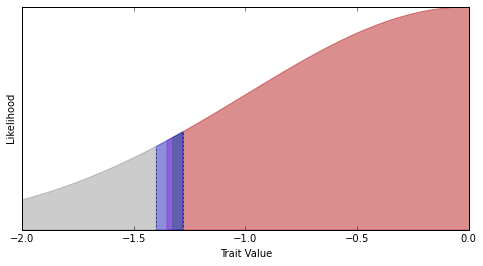

In [13]:
#Use a standard normal distribution
V = 1.0
mu = 0.0

f_i = 1 / 1000
p_i = 0.25
f_j = 1 / 2000
p_j = 0.65

rv = stats.norm(loc=mu, scale=(1 - f_i - f_j)*V)

D_i = np.sqrt((V * f_i) / (p_i * (1 - p_i)))
D_j = np.sqrt((V * f_j) / (p_j * (1 - p_j)))

plt.figure(figsize=(8, 4))
xvals = np.arange(-2, 3, 0.001)

#Threshold value for removal of bottom 10% of the population
frac_removed = 0.10
t = rv.ppf(frac_removed) #Not quite exact - this is based on the normal distribution

plt.fill_between(xvals, 0, rv.pdf(xvals), color='k', alpha=0.2)
plt.fill_between(xvals[xvals > t], 0, 
                 rv.pdf(xvals[xvals > t]), color='r', alpha=0.3)
plt.fill_between(xvals[(t-D_i < xvals) & (xvals < t)], 0,
                 rv.pdf(xvals[(t-D_i < xvals) & (xvals < t)]), color='m', alpha=0.3)
plt.fill_between(xvals[(t-D_j < xvals) & (xvals < t)], 0,
                 rv.pdf(xvals[(t-D_j < xvals) & (xvals < t)]), color='g', alpha=0.3)
plt.fill_between(xvals[(t-D_i-D_j < xvals) & (xvals < t)], 0,
                 rv.pdf(xvals[(t-D_i-D_j < xvals) & (xvals < t)]), color='b', alpha=0.3)

plt.plot([t, t], [0, rv.pdf(t)], ':k')
plt.plot([t-D_i-D_j, t-D_i-D_j], [0, rv.pdf(t-D_i-D_j)], ':k')

plt.xlabel('Trait Value')
plt.ylabel('Likelihood')
plt.yticks([])
plt.title('')
plt.xlim([-2, 0])

Here, individuals positive for both genes will be included with residual trait values $x > t - D_i - D_j$, individuals negative for both genes will be included with residual trait values $x > t$, those only positive for gene $i$ require $x > t - D_i$ and those only positive for gene $j$ require $x > t - D_j$.
We can integrate the normal distribution to calculate the fraction of parents with each genotype:

\begin{equation}
T = q_i q_j \int_{t}^{\infty}e^{\frac{-(x-\mu)^2}{2V(1- f_i - f_j)}}dx + 
    p_i q_j \int_{t-D_i}^{\infty}e^{\frac{-(x-\mu)^2}{2V(1- f_i - f_j)}}dx + 
    q_i p_j \int_{t-D_j}^{\infty}e^{\frac{-(x-\mu)^2}{2V(1- f_i - f_j)}}dx + 
    p_i p_j \int_{t-D_i-D_j}^{\infty}e^{\frac{-(x-\mu)^2}{2V(1- f_i - f_j)}}dx
\end{equation}

\begin{equation}
L_{++}' = \frac{1}{T} p_i p_j \int_{t-D_i-D_j}^{\infty}e^{\frac{-(x-\mu)^2}{2V(1- f_i - f_j)}}dx
\end{equation}

\begin{equation}
L_{+-}' = \frac{1}{T} p_i q_j \int_{t-D_i}^{\infty}e^{\frac{-(x-\mu)^2}{2V(1- f_i - f_j)}}dx
\end{equation}

\begin{equation}
L_{-+}' = \frac{1}{T} q_i p_j \int_{t-D_j}^{\infty}e^{\frac{-(x-\mu)^2}{2V(1- f_i - f_j)}}dx
\end{equation}

\begin{equation}
L_{--}' = \frac{1}{T} q_i q_j \int_{t}^{\infty}e^{\frac{-(x-\mu)^2}{2V(1- f_i - f_j)}}dx
\end{equation}

with

$p_i' = L_{++}' + L_{+-}'$

and

$p_j' = L_{++}' + L_{-+}'.$

We can then calculate the covariance of genes $i$ and $j$ after selection:

$Cov(i,j) = E[(i - p_i'D_i) (j - p_j' D_j)],$

where $i$ and $j$ vary over all possible sets of values:

$Cov(i,j) = L_{++}' ((D_i - p_i'D_i)(D_j - p_j' D_j)) + 
            L_{+-}' ((D_i - p_i'D_i)(0 - p_j' D_j)) + 
            L_{-+}' ((0 - p_i'D_i)(D_j - p_j' D_j)) +
            L_{--}' ((0 - p_i'D_i)(0 - p_j' D_j))$
            
$Cov(i,j) = D_i D_j [L_{++}' q_i' q_j'
                     - L_{+-}' q_i' p_j'
                     - L_{-+}' p_i' q_j'
                     + L_{--}' p_i' p_j']$
                     
With some algebra, we can simplify this to:

$Cov(i,j) = D_i D_j [L_{++}' L_{--}' - L_{-+}' L_{+-}']$

In [17]:
def refine_threshold_pair(p_i, p_j, f_i, f_j, frac_lost, V=1, mu=0, epsilon=1e-15):
    rv = stats.norm(loc=mu, scale=V * (1 - f_i - f_j))
    t = rv.ppf(frac_lost)

    D_i = np.sqrt((V * f_i) / (p_i * (1 - p_i)))
    D_j = np.sqrt((V * f_j) / (p_j * (1 - p_j)))
    
    def calc_fracs(t):
        a = (1 - p_i) * (1 - p_j) * rv.sf(t)
        b = p_i * (1 - p_j) * rv.sf(t - D_i)
        c = (1 - p_i) * p_j * rv.sf(t - D_j)
        d = p_i * p_j * rv.sf(t - D_i - D_j)
        return a, b, c, d
    
    if t < 0:
        upper, lower = 0.0, 2 * t
    elif t > 0:
        upper, lower = 2 * t, 0.0
    else:
        upper, lower = 0.1, -0.1
    
    while sum(calc_fracs(lower)) - sum(calc_fracs(upper)) > epsilon:
        mid = (upper + lower) / 2
        #print 'mid ', sum(calc_fracs(mid))
        if sum(calc_fracs(mid)) <= 1 - frac_lost:
            upper = mid
        else:
            lower = mid
    return mid  

def calc_covariance(p_i, p_j, f_i, f_j, frac_lost, mu=0, V=1):
    rv = stats.norm(loc=mu, scale=(1 - f_i - f_j) * V)

    t = refine_threshold_pair(p_i, p_j, f_i, f_j, frac_lost, V, mu)
    # print 't: ', t
    
    D_i = np.sqrt((V * f_i) / (p_i * (1 - p_i)))
    D_j = np.sqrt((V * f_j) / (p_j * (1 - p_j)))
    
    L_nn = (1 - p_i) * (1 - p_j) * rv.sf(t) / (1 - frac_lost)
    L_pn = p_i * (1 - p_j) * rv.sf(t - D_i) / (1 - frac_lost)
    L_np = (1 - p_i) * p_j * rv.sf(t - D_j) / (1 - frac_lost)
    L_pp = p_i * p_j * rv.sf(t - D_i - D_j) / (1 - frac_lost)
    
    #These probabilities should sum to 1 if we've normalized correctly
    assert abs((L_nn + L_pn + L_np + L_pp) - 1) < 1e-6
    
    # print 'Var: ', (L_pp + L_pn) * (L_np + L_nn) * D_i**2 + (L_pp + L_np) * (L_pn * L_nn) * D_j**2
    
    return D_i * D_j * (L_pp * L_nn - L_np * L_pn)

This covariance is always negative, so it produces a total variance that is less than that expected in the absence of disequilibrium.  The total reduction in variance can be estimated from adding up the contribution from all pairs of genes.  For 500 identical genes with prevalence 0.5 and heritability 0.5, we have total variance reduction for removal of the bottom 10%:

In [37]:
V = 1.0
mu = 0.0
h2 = 0.5

N = 500
f = h2 / N

p = 0.5
D = np.sqrt((V * f) / (p * (1 - p)))

N = h2 / f

print('{N} alleles, heritability {h2}, per-allele prevalence {p}\n'.format(**locals()))

cov = calc_covariance(p, p, f, f, frac_lost=0.1, mu=mu, V=V)
print 'Initial variance: {}'.format(V)
print 'Covariance for a single pair: {}'.format(cov)
print 'Covariance over all pairs: {}'.format(cov * N * (N-1) / 2)
print 'Variance after 1 round of selection: {}'.format(V + cov * N * (N-1) / 2)

0.0632455532034
500.0 alleles, heritability 0.5, per-allele prevalence 0.5

Initial variance: 1.0
Covariance for a single pair: -2.88711055668e-07
Covariance over all pairs: -0.0360167041946
Variance after 1 round of selection: 0.963983295805


In [36]:
V = 1.0
mu = 0.0
h2 = 0.9

N = 10000
f = h2 / N

p = 0.99
D = np.sqrt((V * f) / (p * (1 - p)))

N = h2 / f

print('{N} alleles, heritability {h2}, per-allele prevalence {p}\n'.format(**locals()))

cov = calc_covariance(p, p, f, f, frac_lost=0.25, mu=mu, V=V)
print 'Initial variance: {}'.format(V)
print 'Covariance for a single pair: {}'.format(cov)
print 'Covariance over all pairs: {}'.format(cov * N * (N-1) / 2)
print 'Variance after 1 round of selection: {}'.format(V + cov * N * (N-1) / 2)

10000.0 alleles, heritability 0.9, per-allele prevalence 0.99

Initial variance: 1.0
Covariance for a single pair: -3.65624693129e-09
Covariance over all pairs: -0.18279406533
Variance after 1 round of selection: 0.81720593467


### References

1. Lande, R. and Arnold, S.J.  The Measurement of Selection on Correlated Characters.  Evolution, Vol. 37, No. 6 (Nov 1983).  1210-1226.

1. Falconer, D.S. and Mackay, T.F.C. Introduction to Quantitative Genetics.  4th Edition.  1996.

1. Bulmer, M.G.  The Effect of Selection on Genetic Variability.  The American Naturalist, Vol. 105, No. 943 (May-June 1971).  201-211.

1. Harpending, H. and Cochran, G.  Assortative Mating, Class, and Caste.  pre-print, Dec 2013.